In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# New Sample data: [Hours of Sleep, Participation %]
X = np.array([
    [4, 50],
    [5, 55],
    [6, 60],
    [6, 65],
    [7, 70],
    [7, 75],
    [8, 80],
    [8, 85],
    [9, 90],
    [9, 95]
])

# Performance score (target variable)
y = np.array([45, 50, 55, 58, 60, 65, 70, 73, 78, 82])

In [5]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train using SGDRegressor
sgd = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd.fit(X_scaled, y)

# Coefficients and intercept
print("Coefficients:", sgd.coef_)
print("Intercept:", sgd.intercept_)

# Predict and evaluate
y_pred = sgd.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Coefficients: [5.32966052 6.17950096]
Intercept: [63.36935584]
Mean Squared Error: 1.32
R-squared: 0.99


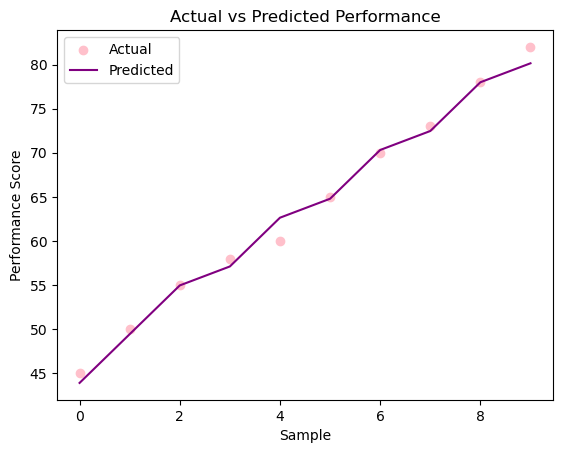

In [6]:
# Plot predictions
plt.scatter(range(len(y)), y, label='Actual', color="pink")
plt.plot(range(len(y_pred)), y_pred, color='purple', label='Predicted')
plt.title('Actual vs Predicted Performance')
plt.xlabel('Sample')
plt.ylabel('Performance Score')
plt.legend()
plt.show()